In [1]:
import pandas as pd
# from mordred import Calculator, descriptors

from rdkit.Chem import Draw, MolToSmiles, MolFromSmiles
from venn import venn
import matplotlib.pyplot as plt

In [2]:
# load datasets pickle from ../data/standardized_data

probes_and_drugs = pd.read_pickle('data_dataset2/standardized_data/protein_binders.pkl')
zinc_dark_matter = pd.read_pickle('data_dataset2/standardized_data/protein_non_binders.pkl')
rna_binders = pd.read_pickle('data_dataset2/standardized_data/rna_binders.pkl')
rna_non_binders = pd.read_pickle('data_dataset2/standardized_data/rna_non_binders.pkl')


In [3]:
rna_binders

,mol,source,smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7ff972862610>,robin_b,CC(=O)c1ccc(Br)c(N)c1
1,<rdkit.Chem.rdchem.Mol object at 0x7ff972862390>,robin_b,O=C(NCCO)c1cc2ccccc2oc1=O
2,<rdkit.Chem.rdchem.Mol object at 0x7ff9728623e0>,robin_b,Nc1ccc2oc(-c3ccccc3)nc2c1
3,<rdkit.Chem.rdchem.Mol object at 0x7ff972862340>,robin_b,Nc1ccc(-c2nc3ccccc3o2)cc1
4,<rdkit.Chem.rdchem.Mol object at 0x7ff972862520>,robin_b,Cc1nc2ccc(CCO)cc2s1
...,...,...,...
1998,<rdkit.Chem.rdchem.Mol object at 0x7ff971746430>,robin_b,C=CC(=O)Nc1cccc(Nc2nc(N[C@H]3CC[C@H](N(C)C)CC3...
1999,<rdkit.Chem.rdchem.Mol object at 0x7ff971e9e480>,robin_b,N#C/C(C(=O)c1ccc(Cl)cc1Cl)=C1\NC(=O)c2ccc(Cl)c...
2000,<rdkit.Chem.rdchem.Mol object at 0x7ff9721de4d0>,robin_b,C[C@H](N[C@H]1C[C@H]1c1ccccc1)c1ccc2c(c1)OCCO2
2001,<rdkit.Chem.rdchem.Mol object at 0x7ff971746520>,robin_b,NCCC[C@@H](N)CC(=O)N[C@H]1CNC(=O)[C@@H]([C@@H]...


In [4]:
rna_non_binders

,mol,source,smiles
2003,<rdkit.Chem.rdchem.Mol object at 0x7ff9711296c0>,robin_n,Nc1ccc2nonc2c1
2004,<rdkit.Chem.rdchem.Mol object at 0x7ff97112a2f0>,robin_n,OCn1cncn1
2005,<rdkit.Chem.rdchem.Mol object at 0x7ff97112aa70>,robin_n,Nc1nc2c(ccc3ccccc32)s1
2006,<rdkit.Chem.rdchem.Mol object at 0x7ff971129cb0>,robin_n,CCN(CC)c1ccc2c(C)c(CO)c(=O)oc2c1
2007,<rdkit.Chem.rdchem.Mol object at 0x7ff9726316c0>,robin_n,O=C1S[C@H](Nc2ccccc2)C(=O)N1c1ccccc1
...,...,...,...
24487,<rdkit.Chem.rdchem.Mol object at 0x7ff9708d6d40>,robin_n,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(CN4CCOCC4)cc3)cc3...
24488,<rdkit.Chem.rdchem.Mol object at 0x7ff97074ed90>,robin_n,Cc1ccc(S(=O)(=O)n2c(N)nc3ccccc32)cc1
24489,<rdkit.Chem.rdchem.Mol object at 0x7ff970776de0>,robin_n,NC(=O)c1cnc(N[C@@H]2CCCC[C@@H]2N)nc1Nc1cccc(-n...
24490,<rdkit.Chem.rdchem.Mol object at 0x7ff97074ee30>,robin_n,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...


In [5]:
# for each dataset create a column source, which will be used to identify the source of the molecule

probes_and_drugs['source'] = 'probes_and_drugs'
zinc_dark_matter['source'] = 'zinc_dark_matter'
rna_binders['source'] = 'rna_b' 
rna_non_binders['source'] = 'rna_n'


In [6]:
rna_non_binders.head(1)

,mol,source,smiles
2003,<rdkit.Chem.rdchem.Mol object at 0x7ff9711296c0>,rna_n,Nc1ccc2nonc2c1


In [7]:
# create folder venn_diagrams to save venn diagrams
import os
if not os.path.exists('../output/venn_diagrams/set2'):
    os.makedirs('../output/venn_diagrams/set2')

In [8]:

def read_smiles(dataframe):
    return set(dataframe['smiles'])

# Read the SMILES from each DataFrame and store them in separate variables
library1 = read_smiles(probes_and_drugs)
library2 = read_smiles(zinc_dark_matter)
library3 = read_smiles(rna_binders)
library4 = read_smiles(rna_non_binders)

# Create a merged library from libraries 1, 2, and 4
merged_library = library2.union(library1, library2, library4)

# Calculate intersections and store duplicates for the first Venn Diagram
intersections_1 = {
    "Probes & Drugs & Zinc Dark Matter": library1.intersection(library2),
    "Probes & Drugs & RNA-binders": library1.intersection(library3),
    "Probes & Drugs & RNA-non-binders": library1.intersection(library4),
    "Zinc Dark Matter & RNA-binders": library2.intersection(library3),
    "Zinc Dark Matter & RNA-non-binders": library2.intersection(library4),
    "RNA-binders & RNA-non-binders": library3.intersection(library4),
    "Probes & Drugs & Zinc Dark Matter & RNA-binders": library1.intersection(library2, library3),
    "Probes & Drugs & Zinc Dark Matter & RNA-non-binders": library1.intersection(library2, library4),
    "Probes & Drugs & RNA-binders & RNA-non-binders": library1.intersection(library3, library4),
    "Zinc Dark Matter & RNA-binders & RNA-non-binders": library2.intersection(library3, library4),
    "Probes & Drugs & Zinc Dark Matter & RNA-binders & RNA-non-binders": library1.intersection(library2, library3, library4),
    
}

# Save duplicates information as pickled DataFrames for each intersection in the first Venn Diagram
for key, value in intersections_1.items():
    mols = [MolFromSmiles(smiles) for smiles in value]
    duplicates_1 = pd.DataFrame({"mol": mols, "smiles": list(value)})
    pickle_file_name = f"venn_intersections_1_{key.replace(' ', '_')}.pkl"
    duplicates_1.to_pickle(f'../output/venn_diagrams/set2/{pickle_file_name}')

# Create the first Venn diagram
dataset_dict_1 = {
    "Probes & Drugs": library1,
    "Zinc Dark Matter": library2,
    "RNA-binders": library3,
    "RNA-non-binders": library4,
}
    
venn(dataset_dict_1, fmt="{size}", cmap="viridis")

# Save the first figure
plt.savefig('../output/venn_diagrams/set2/venn_diagram_1.png', dpi=400)

plt.clf()  # clear figure for next plot

# Calculate intersections and store duplicates for the second Venn Diagram
intersections_2 = {
    "RNA-binders & Merged Library": library3.intersection(merged_library),
}

# Save duplicates information as a pickled DataFrame for the second Venn Diagram
for key, value in intersections_2.items():
    mols = [MolFromSmiles(smiles) for smiles in value]
    duplicates_2 = pd.DataFrame({"mol": mols, "smiles": list(value)})
    pickle_file_name = f"venn_intersections_2_{key.replace(' ', '_')}.pkl"
    duplicates_2.to_pickle(f'../output/venn_diagrams/set2/{pickle_file_name}')



# Create the second Venn diagram
dataset_dict_2 = {
    "RNA-binders": library3,
    "Non-RNA-binding set": merged_library,
}

venn(dataset_dict_2, fmt="{size}", cmap="viridis")

# Save the second figure
plt.savefig('../output/venn_diagrams/set2/venn_diagram_2.png', dpi=600)
plt.clf()  # clear figure for next plot


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [9]:
# save all intersections as txt file with smiles to one file
all_intersections = {**intersections_1, **intersections_2}

with open('../output/venn_diagrams/set2/all_intersections.txt', 'w') as f:
    for key, value in all_intersections.items():
        f.write(f'{key}\n')
        for item in value:
            f.write(f'{item}\n')
        f.write('\n\n\n')


In [10]:
# load datasets pickle venn_intersections_1.pkl from ../data/standardized_data
venn_intersections_1_all = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Probes_&_Drugs_&_Zinc_Dark_Matter_&_RNA-binders_&_RNA-non-binders.pkl')

probes_and_drugs_zinc = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Probes_&_Drugs_&_Zinc_Dark_Matter.pkl')
probes_and_drugs_rna_b = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Probes_&_Drugs_&_RNA-binders.pkl')
probes_and_drugs_rna_n = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Probes_&_Drugs_&_RNA-non-binders.pkl')

zinc_rna_b = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Zinc_Dark_Matter_&_RNA-binders.pkl')
zinc_rna_n = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Zinc_Dark_Matter_&_RNA-non-binders.pkl')


rna_b_rna_n = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_RNA-binders_&_RNA-non-binders.pkl')

probes_and_drugs_zinc_rna_b = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Probes_&_Drugs_&_Zinc_Dark_Matter_&_RNA-binders.pkl')
probes_and_drugs_zinc_rna_n = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Probes_&_Drugs_&_Zinc_Dark_Matter_&_RNA-non-binders.pkl')
probes_and_drugs_rna_b_rna_n = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Probes_&_Drugs_&_RNA-binders_&_RNA-non-binders.pkl')

zinc_rna_b_rna_n = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Zinc_Dark_Matter_&_RNA-binders_&_RNA-non-binders.pkl')

probes_and_drugs_zinc_rna_b_rna_n = pd.read_pickle('../output/venn_diagrams/set2/venn_intersections_1_Probes_&_Drugs_&_Zinc_Dark_Matter_&_RNA-binders_&_RNA-non-binders.pkl')

# create a merged dataframe with all intersections
all_intersections = pd.concat([probes_and_drugs_zinc, probes_and_drugs_rna_b, probes_and_drugs_rna_n, zinc_rna_b, zinc_rna_n, rna_b_rna_n, probes_and_drugs_zinc_rna_b, probes_and_drugs_zinc_rna_n, probes_and_drugs_rna_b_rna_n, zinc_rna_b_rna_n, probes_and_drugs_zinc_rna_b_rna_n])



In [11]:
# # visualize the molecules in the intersection of probes_and_drugs and zinc_dark_matter
# Draw.MolsToGridImage(list(probes_and_drugs_zinc['mol']), molsPerRow=4, subImgSize=(200, 200),
#                      legends=[f"SMILES: {smiles}" for smiles in probes_and_drugs_zinc['SMILES']]).save('../output/venn_diagrams/set2/probes_and_drugs_zinc.png')

In [12]:
rna_b_rna_n

,mol,smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7ff9707225c0>,c1cc(CNc2ccc(Cn3cncn3)cc2)c2cc[nH]c2c1
1,<rdkit.Chem.rdchem.Mol object at 0x7ff97040b2e0>,CCCCN1CCc2c1nc1ccc(Br)cc1c2N
2,<rdkit.Chem.rdchem.Mol object at 0x7ff970415940>,Cc1ccc2c(=N)[nH][nH]c2n1
3,<rdkit.Chem.rdchem.Mol object at 0x7ff970415a30>,CNc1ccc(Br)cc1C(=O)c1ccccc1Cl
4,<rdkit.Chem.rdchem.Mol object at 0x7ff970415ad0>,CCCCOC[C@@H](O)CN1CCN(C(C)=O)CC1
5,<rdkit.Chem.rdchem.Mol object at 0x7ff970415b20>,Cc1ccc(NCC(=O)c2ccc(-c3ccccc3)cc2)cc1
6,<rdkit.Chem.rdchem.Mol object at 0x7ff970415b70>,O[C@H](COc1ccccc1)CN1CCCCCC1
7,<rdkit.Chem.rdchem.Mol object at 0x7ff970415bc0>,Cc1ccc(OC[C@@H](O)CN2CCN(CCN3C(=O)c4cccc5cccc(...
8,<rdkit.Chem.rdchem.Mol object at 0x7ff970415c10>,Nc1c(Cl)ncnc1NCCO
9,<rdkit.Chem.rdchem.Mol object at 0x7ff970415c60>,Cc1ccc2nc3c(c(N)c2c1)CCN3c1ccccc1


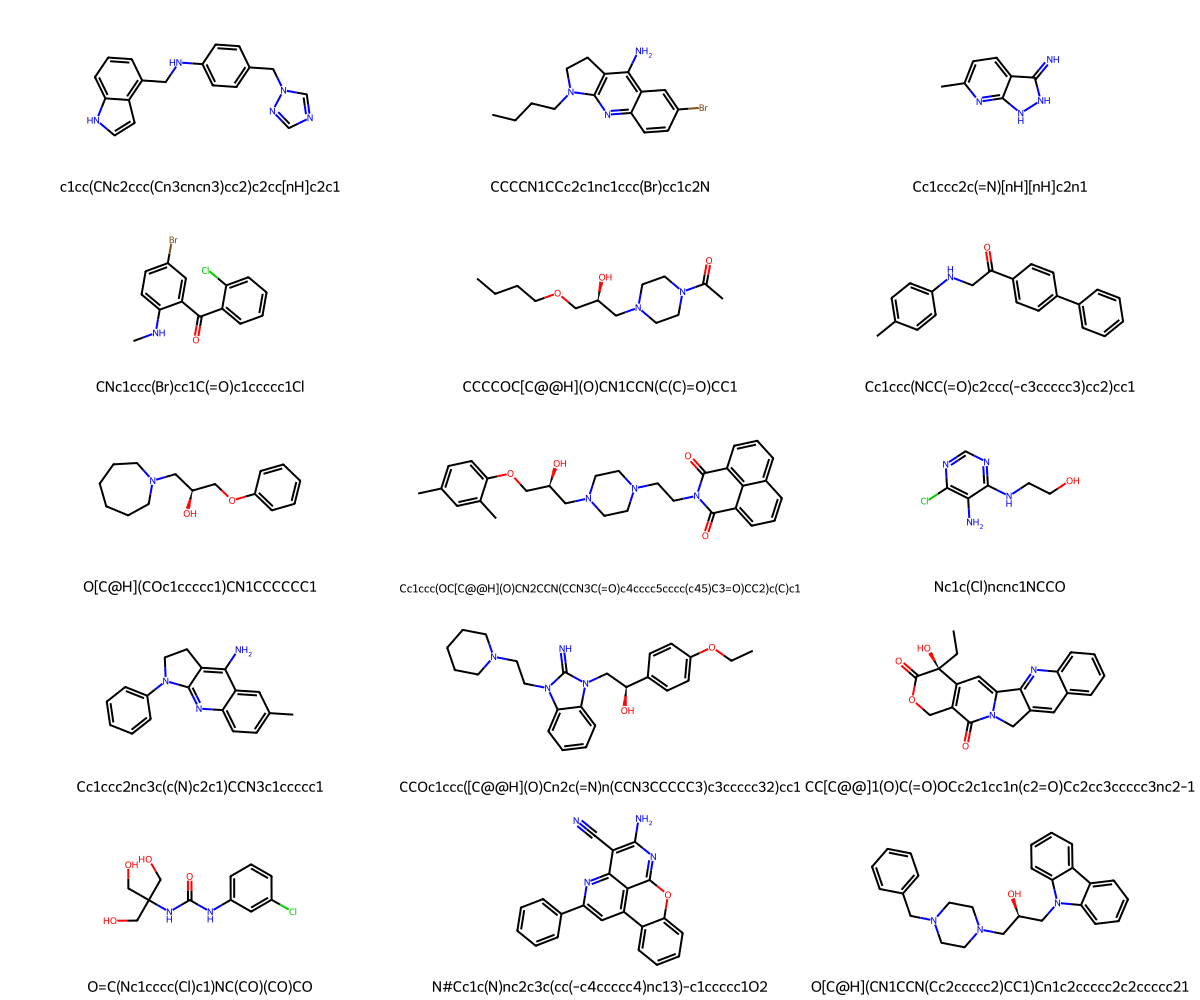

In [13]:
# visualize the molecules in the intersection of RNA-binders and RNA-non-binders
Draw.MolsToGridImage(list(rna_b_rna_n['mol']), molsPerRow=3, subImgSize=(400, 200),
                     legends=[f"{smiles}" for smiles in rna_b_rna_n['smiles']])

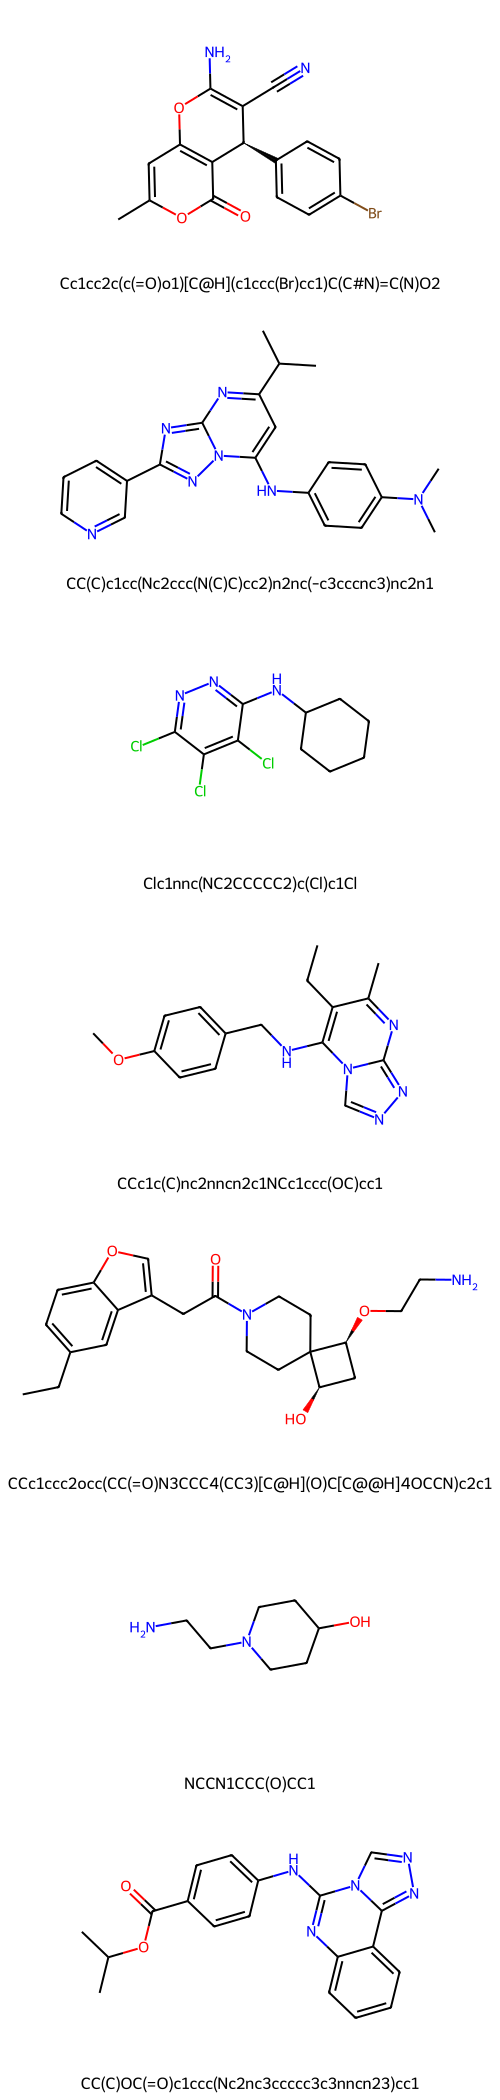

In [14]:
# visualize the molecules in the intersection of rna_binders and zinc_dark_matter
Draw.MolsToGridImage(list(zinc_rna_b['mol']), molsPerRow=1, subImgSize=(500, 300),
                     legends=[f"{smiles}" for smiles in zinc_rna_b['smiles']])

In [15]:
# # print out smiles of molecules in the intersection of rna

In [16]:
# # print this smiles  CN(C)CCNc1nc2c(c(=O)n(C)c(=O)n2C)n1Cc1ccccc1Cl and visualize it
# mol = MolFromSmiles('CN(C)CCNc1nc2c(c(=O)n(C)c(=O)n2C)n1Cc1ccccc1Cl')
# Draw.MolToImage(mol, size=(400, 400), useSVG=True)

In [17]:
# # print this smiles  Cn1c2c(c(=O)n(c1=O)C)n(c(n2)NCCN(C)C)Cc3ccccc3Cl and visualize it
# mol = MolFromSmiles('Cn1c2c(c(=O)n(c1=O)C)n(c(n2)NCCN(C)C)Cc3ccccc3Cl')
# Draw.MolToImage(mol, size=(400, 400), useSVG=True)


In [18]:
# # visualize the molecules in the intersection of life_chemicals and robin
# Draw.MolsToGridImage(list(life_chemicals_robin['mol']), molsPerRow=1, subImgSize=(400, 400), legends=list(life_chemicals_robin['SMILES']), useSVG=False)


In [19]:
# # print out smiles of molecules in the intersection of life_chemicals_robin
# print(list(life_chemicals_robin['SMILES']))

In [20]:
# # visualize the molecules in the intersection of life_chemicals and robin
# Draw.MolsToGridImage(list(life_chemicals_robin['mol']), molsPerRow=4, subImgSize=(350, 350), legends=list(life_chemicals_robin['SMILES']), useSVG=True)

In [21]:
# # visualize the molecules in the intersection of life_chemicals and robin
# Draw.MolsToGridImage(list(life_chemicals_robin['mol']), molsPerRow=3, subImgSize=(350, 350), useSVG=True) # , legends=list(life_chemicals_robin['SMILES'])

In [22]:
# # visualize the molecules in the intersection of life_chemicals and chemdiv and enamine
# Draw.MolsToGridImage(list(life_chemicals_chemdiv_enamine['mol'][:12]), molsPerRow=4, subImgSize=(350, 200), useSVG=True) # , legends=list(life_chemicals_chemdiv_enamine['SMILES'])

In [23]:
# # visualize the molecules in the intersection of Protein-Targeted Enamine & Merged RNA-Targeted Libraries
# Draw.MolsToGridImage(list(protein_all_rna['mol'][:12]), molsPerRow=5, subImgSize=(350, 200), useSVG=True) # legends=list(protein_all_rna['SMILES']),